In [1]:
import sys
sys.path.append("../src")
sys.path.append("../../pyASBC/src")

In [19]:
from itertools import islice, chain
from tqdm.auto import tqdm
import pyASBC

In [21]:
asbc = pyASBC.Asbc5Corpus()
art_iter = asbc.iter_articles()
# arts = list(islice(art_iter, 0, 10))

In [23]:
fout = open("../data/asbc5_plaintext.txt", "w", encoding="UTF-8")
for art_x in tqdm(art_iter):
    sentences = chain.from_iterable(art_x.text.sentences)
    words = list(x[0] for x in sentences)    
    fout.write(" ".join(words))
    fout.write("\n")
fout.close()

In [44]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
sentences = LineSentence("../data/asbc5_plaintext.txt")
model = Word2Vec(sentences=sentences, vector_size=100, window=4, min_count=1, sg=1)

In [45]:
model.wv.most_similar("社會")

[('價值觀', 0.7773040533065796),
 ('官場', 0.7543518543243408),
 ('法治', 0.7478263974189758),
 ('政治', 0.7471388578414917),
 ('常民', 0.7431473135948181),
 ('場域', 0.7417535781860352),
 ('惡質', 0.7380430102348328),
 ('弊病', 0.737770676612854),
 ('不平等', 0.737763524055481),
 ('女權', 0.7365112900733948)]

In [46]:
model.wv.save("../data/asbc5_w2v_sg.kv")

## Construct FluidVec Word Vectors

In [50]:
from fluidvec import *

In [51]:
vs = VocabSet.load()
wvocab = vs.word_vocab

In [55]:
import numpy as np
from gensim.models import KeyedVectors
wv = KeyedVectors.load("../data/asbc5_w2v_sg.kv")

In [56]:
wvocab.encode(wv.index_to_key[1])

27

In [58]:
fwv = np.random.randn(len(wvocab), wvecs.shape[1])
oov = []
for word, findex in wvocab.vocab.items():
    if word not in wv: 
        oov.append(word)
        continue
    fwv[findex, :] = wv.get_vector(word)

In [62]:
np.allclose(fwv[wvocab.encode("社會")], wv.get_vector("社會"))

True

In [ ]:
norms = np.linalg.norm(fwv, axis=1)
fwv /= norms[:, np.newaxis]

In [63]:
np.save("../data/asbc5_w2v_norm_sg.npy", fwv)

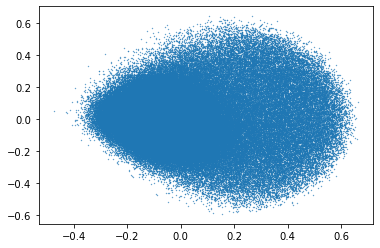

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(2)
proj = pca.fit_transform(wvecs)
plt.scatter(proj[:,0], proj[:,1], s=0.1)

In [65]:
len(wvocab)

217350